# LECTURA DE DATASET E IMPORTACION DE LIBRERIAS

In [2]:
from pandasgui import show 
#librerías de manejo de datos
import numpy as np
import pandas as pd
import math

#librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


import subprocess
import sys

try:
    import folium
except ImportError as e:
    !pip install folium wget
    #subprocess.check_call([sys.executable, "-m", "pip", "install", 'folium'])
finally:
    import folium

from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

# Construye la ruta relativa al archivo
ruta_relativa = "../primer_proyecto_datos/milan_airbnb.csv"

# Lee el archivo CSV
df = pd.read_csv(ruta_relativa)

In [3]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6400,The Studio Milan,13822,Francesca,TIBALDI,45.44119,9.17813,Private room,100,4,12,19/04/10,0.14,1,358
1,23986,""" Characteristic Milanese flat""",95941,Jeremy,NAVIGLI,45.44806,9.17373,Entire home/apt,150,1,15,07/09/20,0.21,1,363
2,28300,nice flat near the park,121663,Marta,SARPI,45.47647,9.17359,Private room,180,1,8,22/04/12,0.11,1,365
3,32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,VIALE MONZA,45.52014,9.22300,Entire home/apt,75,2,15,01/07/18,0.23,3,200
4,32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,VIALE MONZA,45.51874,9.22495,Entire home/apt,71,2,29,23/10/16,0.71,3,308


In [4]:
# Function que facilita la exploración básica del dataset
def summary(df):
    total_values = df.shape[0]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} rows.")    
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 15 features and 18322 rows.


,Unique,Missing,Missing %,Duplicated,Types
id,18322,0,0.00,0,int64
name,18050,10,0.05,0,object
host_id,12213,0,0.00,0,int64
host_name,2917,124,0.68,0,object
neighbourhood,87,0,0.00,0,object
latitude,7419,0,0.00,0,float64
longitude,9134,0,0.00,0,float64
room_type,4,0,0.00,0,object
price,465,0,0.00,0,int64
minimum_nights,68,0,0.00,0,int64


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.832200e+04,1.832200e+04,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,13260.000000,18322.000000,18322.000000
mean,2.587132e+07,8.494918e+07,45.471318,9.187382,115.094913,5.798112,23.720827,0.799344,14.421897,153.508624
std,1.525744e+07,1.040579e+08,0.020731,0.029543,290.793019,26.687720,57.657486,1.220346,46.295635,138.757302
min,6.400000e+03,1.944000e+03,45.395050,9.060680,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.214067e+07,1.243642e+07,45.454462,9.168782,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,2.588718e+07,3.141304e+07,45.470875,9.186291,73.500000,2.000000,3.000000,0.310000,1.000000,123.000000
75%,3.926758e+07,1.335227e+08,45.486850,9.209680,110.000000,3.000000,19.000000,0.990000,4.000000,302.000000
max,5.095505e+07,4.117208e+08,45.539850,9.275280,11999.000000,1124.000000,896.000000,13.710000,314.000000,365.000000


## Resumen Estadístico General

**- ¿Cuántas filas y columnas tiene el dataset?** 

Dataset has 15 features and 18322 rows.

**- ¿Cuál es el rango de valores de las variables numericas?** 
1. latitude: min (45.395050) - max (45.539850)
2. longitude: min (9.060680) - max (9.275280)
3. price: min (8.000000) - max (11999.000000)
4. minimum_nights: min (1.000000) - max (1124.000000)
5. number_of_reviews: min (0.000000) - max (896.000000)
6. reviews_per_month: min (0.010000) - max (13.710000)
7. calculated_host_listings_count: min (1.000000) - max (314.000000)
8. availability_365: min (0.000000) - max (365.000000)

**- ¿Cuántos valores únicos hay en las variables categóricas (name, host_name, neighbourhood, room_type)?**
- "name"	18050
- "host_name"	2917
- "neighbourhood"	87
- "room_type"	4


**- ¿Cuántos registros tienen valores faltantes?**
1. "name"	 10 null  --> 0.05%
2. "host_name"	 124 null --> 0.68%
3. "last_review"	5062 --> 27.63%
4. "reviews_per_month"  5062  --> 27.63%

In [6]:
# Se guarda en una variable todas las columnas numericas menos el id

var_num = ["host_id", "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", 
           "calculated_host_listings_count", "availability_365"]

In [7]:
"""for col in var_num:
    print(f"Column name: {col}")
    plt.figure(figsize = (6, 4))
    plt.subplot(111)
    sns.histplot(data = df, x = df[col], multiple = 'dodge', binwidth = 0.3)
    plt.show()
    print()"""

'for col in var_num:\n    print(f"Column name: {col}")\n    plt.figure(figsize = (6, 4))\n    plt.subplot(111)\n    sns.histplot(data = df, x = df[col], multiple = \'dodge\', binwidth = 0.3)\n    plt.show()\n    print()'

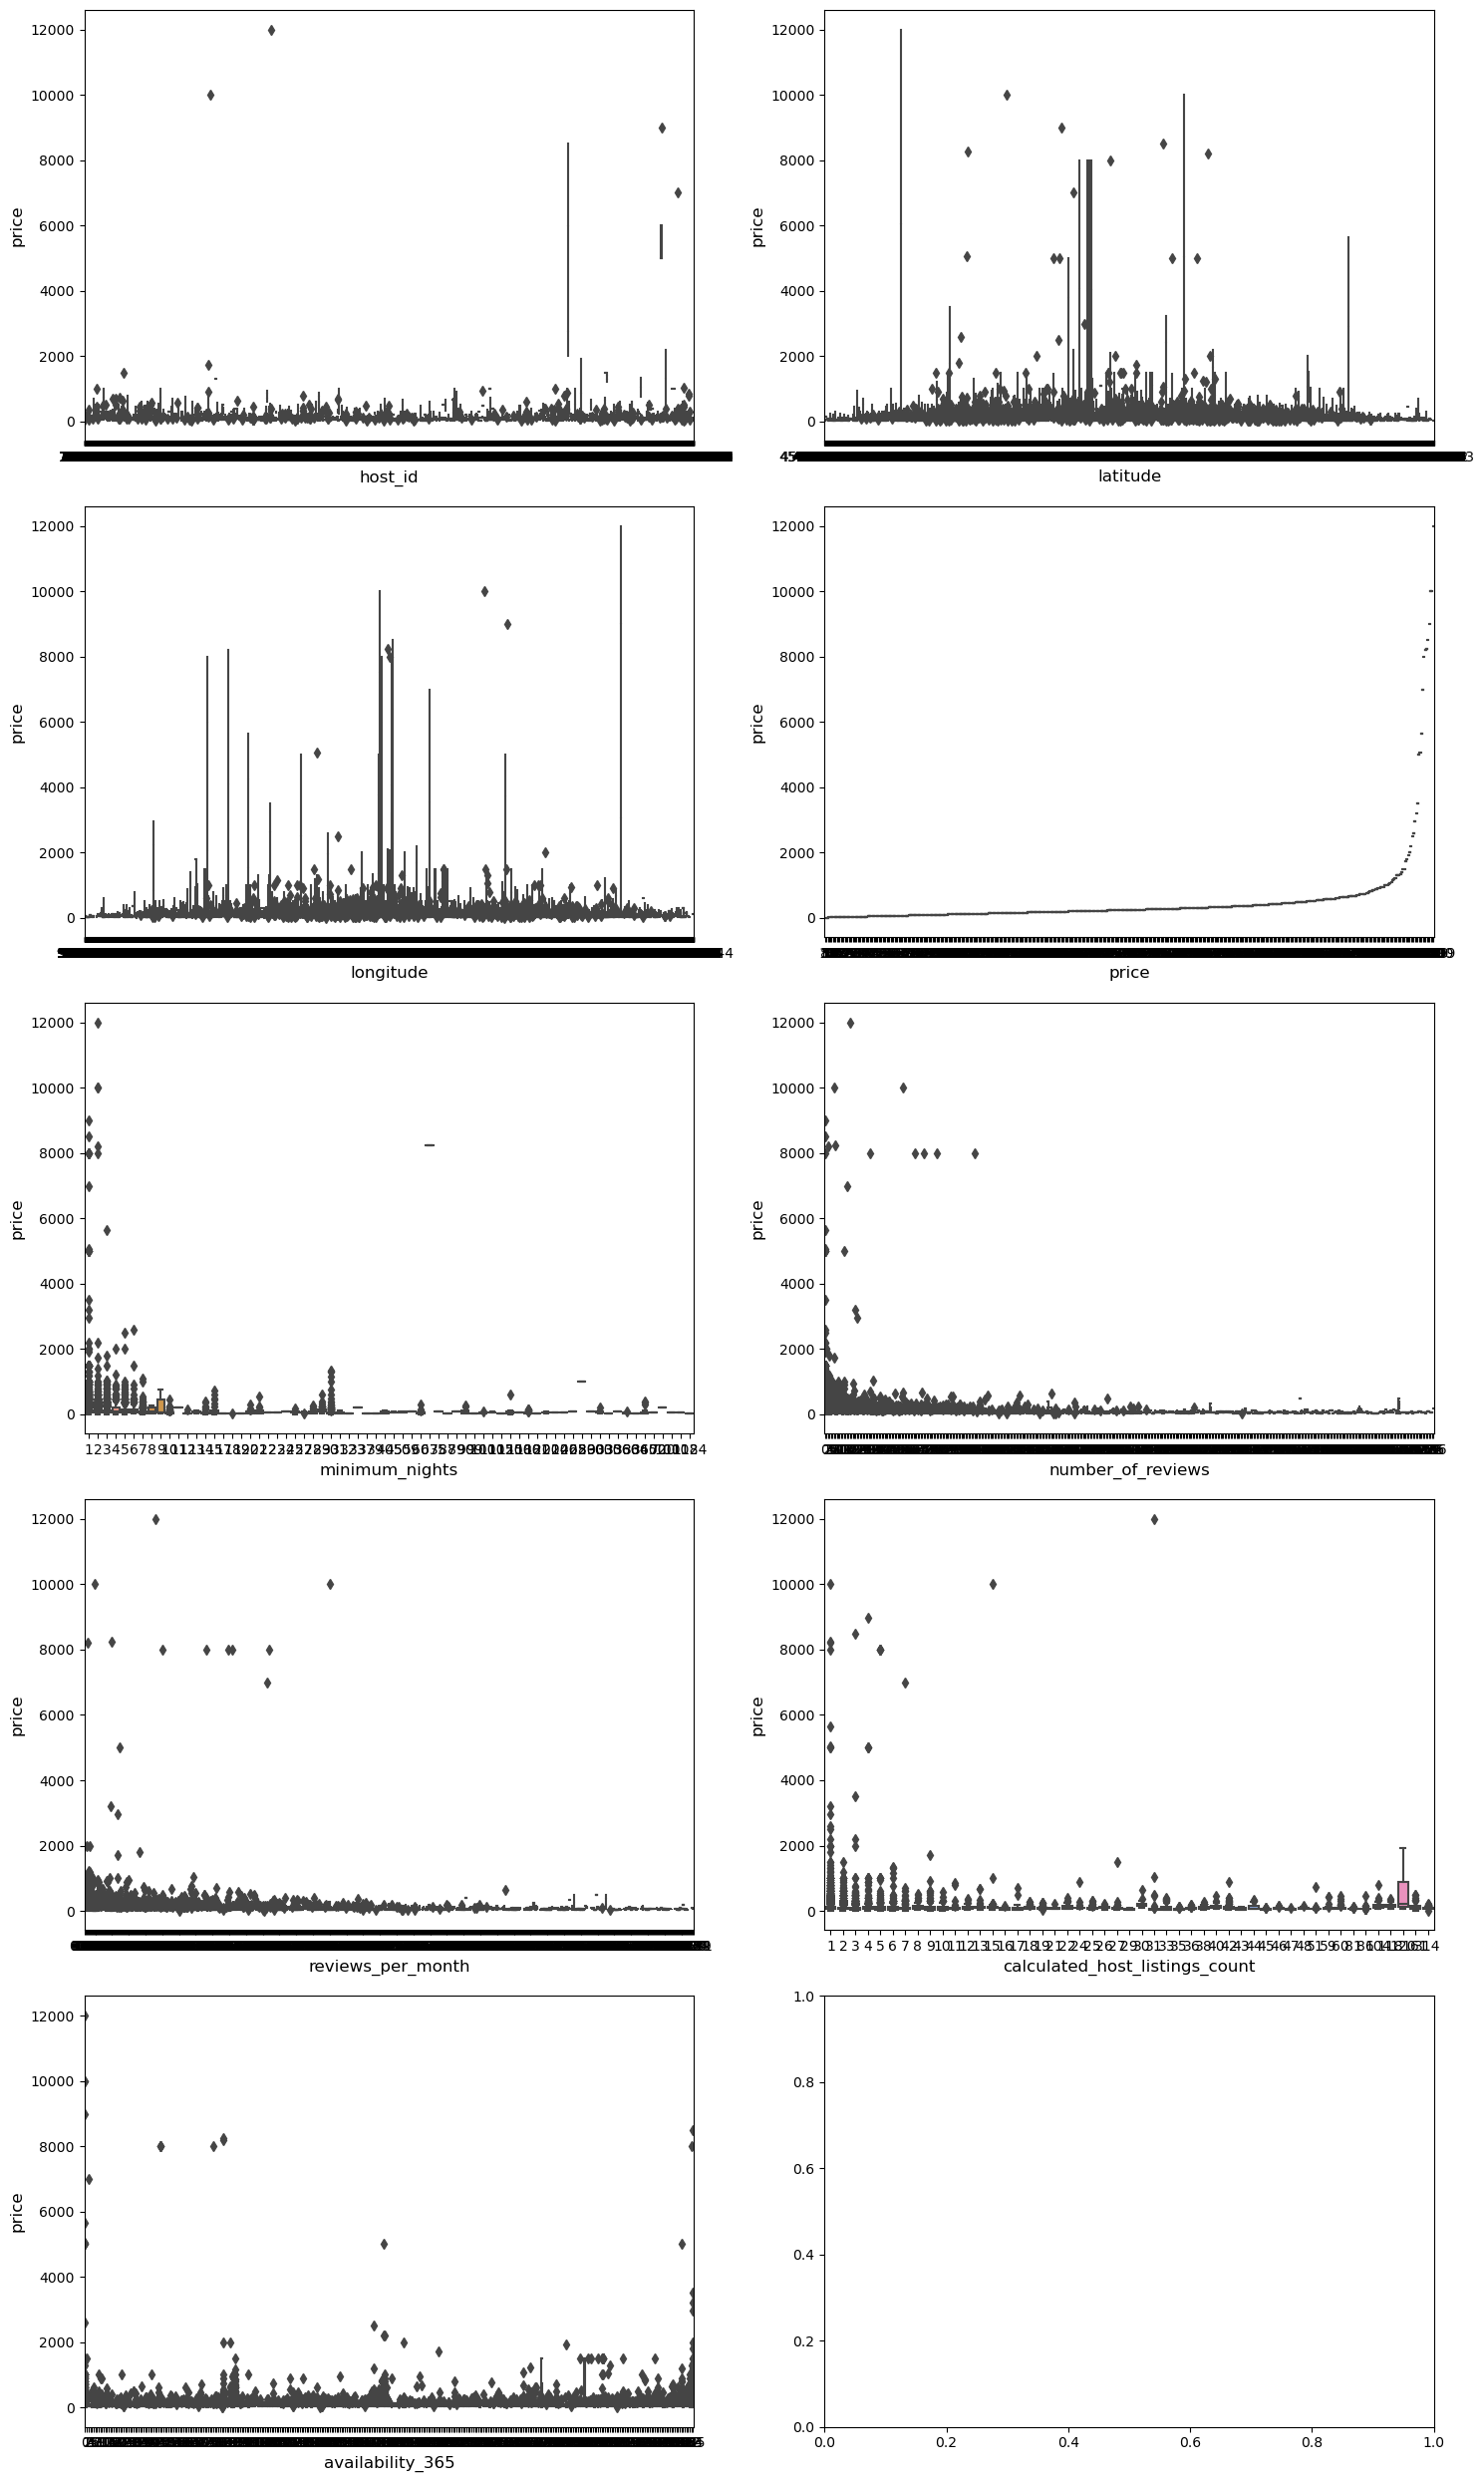

In [8]:
# Calcula el número de filas y columnas para los subplots
n_rows, n_cols = math.ceil(len(var_num) / 2), 2

# Crea una figura y ejes para los subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Inicializa el contador i
i = 0

# Itera sobre las variables numéricas
for var in var_num:
    # Calcula la fila y columna actual
    row = i // n_cols
    col = i % n_cols
    
    # Crea el gráfico de caja para la variable actual
    sns.boxplot(data=df, x=var, y="price", ax=ax[row, col])
    
    # Establece etiquetas para los ejes x e y
    ax[row, col].set_xlabel(var, fontsize=12)
    ax[row, col].set_ylabel('price', fontsize=12)
    
    # Incrementa el contador
    i += 1

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()

In [9]:
def printcorr(df = df):
    corr = df.corr()
    
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(25, 20))
    
    # Generate a mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype = bool))
    
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap = True)

    # Draw the heatmap
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap, vmin=-1, vmax=1)

## Analisis columna precios

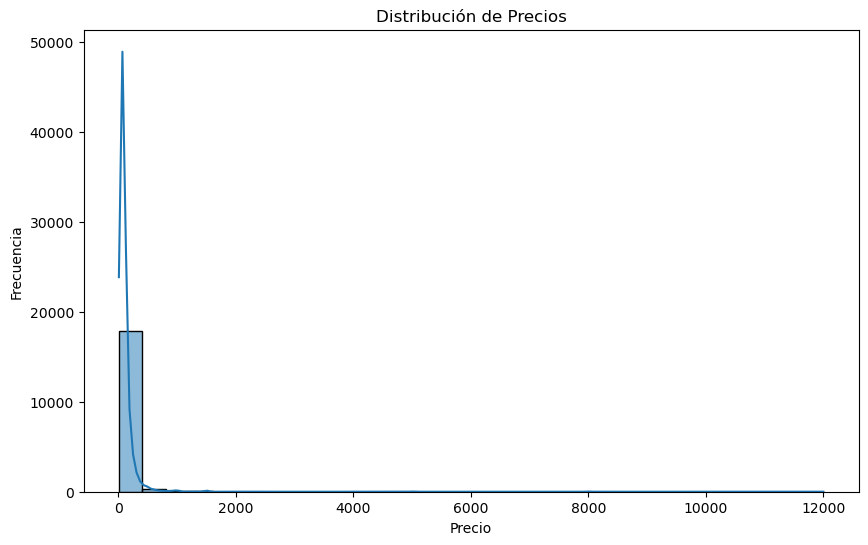

In [10]:
# Crear un histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

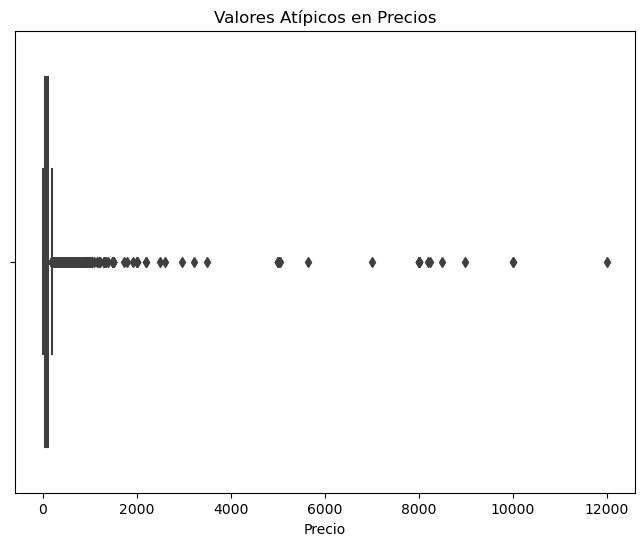

In [11]:
# Crear un gráfico de caja (box plot) para identificar valores atípicos en precios
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Valores Atípicos en Precios')
plt.xlabel('Precio')
plt.show()

In [12]:
import plotly.express as px

# Crear un gráfico de caja interactivo para identificar valores atípicos en precios
fig = px.box(df, x='price', title='Valores Atípicos en Precios', labels={'price': 'Precio'})

# Mostrar el gráfico interactivo
fig.show()

In [13]:
# Calcular el IQR (rango intercuartílico)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales para valores atípicos
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df[(df['price'] < umbral_inferior) | (df['price'] > umbral_superior)]

print(valores_atipicos)

             id                                   name    host_id  host_name  \
15        74835    Amazin attic in front of the castle     157872    Augusto   
20        81908         DESIGN FASHION WEEK APARTMENTT     445128       Anna   
34        98500      LUXURIOUS bright adjacent Avenida     514653     Angelo   
70       227032    Extraordinary flat + private garden    1184388       Alex   
71       233795                Luxury B&B Antica Brera    1224206    Antonia   
...         ...                                    ...        ...        ...   
18279  50884985   Cosy Junior Suite Standard At Milano  175128252        NaN   
18280  50885001          Nice Suite Standard At Milano  175128252        NaN   
18295  50905571  Breathtaking Double Economy At Milano  175128252        NaN   
18302  50907106        Entire Suite Standard At Milano  175128252        NaN   
18319  50934102                   MODERN APT. IN REPUB  338964464  Valentina   

            neighbourhood   latitude  l

Distribución de Precios:
¿Cómo se distribuyen los precios de las propiedades?
¿Cuál es el precio promedio, mediano y máximo de las propiedades?
¿Existen valores atípicos (outliers) en los precios?

Análisis Geoespacial:
¿Cómo se distribuyen las propiedades en el mapa (latitude y longitude)?
¿Hay áreas geográficas con mayor concentración de propiedades?
¿Se pueden identificar patrones geográficos en función del tipo de habitación (room_type)?

Tipos de Habitaciones:
¿Cuántos y cuáles son los diferentes tipos de habitaciones (room_type)?
¿Cuál es la distribución de precios según el tipo de habitación?
¿Hay tipos de habitaciones más populares que otros?

Análisis de Reviews:
¿Cuál es la cantidad promedio de reviews por mes (reviews_per_month)?
¿Existe alguna correlación entre el número de reviews y el precio de las propiedades?
¿Cuándo se realizó el último review (last_review) y cuál es su distribución?

Hosts más Prolíficos:
¿Quiénes son los hosts con más propiedades listadas (calculated_host_listings_count)?
¿Existe alguna relación entre la cantidad de propiedades de un host y la disponibilidad (availability_365)?
Análisis por Barrios (Neighbourhood):
¿Cuáles son los barrios con mayor número de propiedades?
¿Cómo varían los precios según el barrio?
¿Hay diferencias significativas en la disponibilidad por barrio?

Estadísticas Temporales:
¿Cómo han evolucionado las estadísticas de reviews y disponibilidad con el tiempo?
¿Se pueden identificar tendencias estacionales?

Preguntas Específicas del Contexto:
Si tienes información adicional sobre el contexto de estos datos (como ubicación geográfica específica o eventos importantes en la ciudad), puedes formular preguntas adicionales relacionadas con ese contexto.

Preparación de Datos:
Realiza tareas de limpieza de datos si es necesario, como manejo de valores faltantes, eliminación de duplicados, etc.